In [1]:
#https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

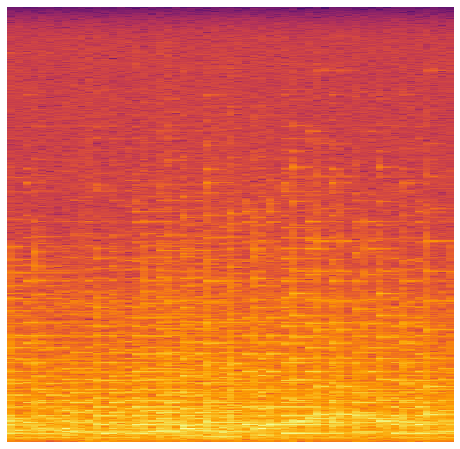

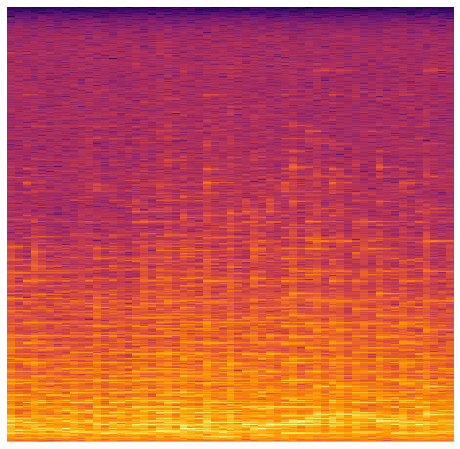

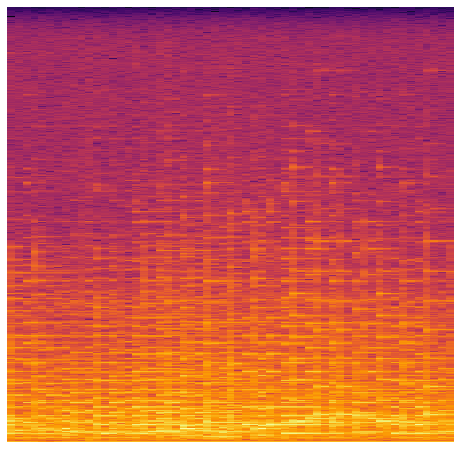

In [2]:
cmap = plt.get_cmap('inferno')
stegs = 'original ones zeros'.split()
for g in stegs:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./stegoworksdsss/{g}'):
        songname = f'./stegoworksdsss/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.figure(figsize=(8,8))
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.show()

In [3]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [4]:
file = open('dataset_dsss.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
stegs = 'original ones zeros'.split()
for g in stegs:
    for filename in os.listdir(f'./stegoworksdsss/{g}'):
        songname = f'./stegoworksdsss/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rms = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset_dsss.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [8]:
data = pd.read_csv('dataset_dsss.csv')
data.head()
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(data.iloc[:, :-1])

print(X)
print(y)

   chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.209805  0.053749         784.025099          785.480247  1298.761907   
1     0.210819  0.058904         778.966771          803.944930  1315.058136   
2     0.207129  0.058266         782.943089          805.421031  1322.783296   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3     mfcc4  ...  \
0            0.049807 -326.840668  195.610916 -17.375395  2.201211  ...   
1            0.050300 -313.611450  198.626389 -20.301563  7.959607  ...   
2            0.050190 -315.011017  198.097244 -20.306684  7.501722  ...   

     mfcc11    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
0 -6.887125 -6.038435 -3.639237 -1.142895 -1.839319 -3.073911 -4.248350   
1 -5.150096 -2.827235 -0.572335  1.144929 -0.808959 -2.639790 -3.976907   
2 -5.711053 -3.386379 -0.221955  1.957635  0.657856 -1.393346 -3.334176   

     mfcc18    mfcc19    mfcc20  
0 -6.075161 -5.378838 -3.744005  
1 -6.3087

In [9]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=128)

Epoch 1/200
1/1 [==============================] - 0s 926us/step - loss: 2.4605 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 2.2109 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 2.0440 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 1.9148 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.7940 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6793 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 1.5632 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 1.4357 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 1.3114 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 1.1883 - accuracy: 1.0000
Epoch 11/2

1/1 [==============================] - 0s 6ms/step - loss: 1.3803e-04 - accuracy: 1.0000
Epoch 83/200
1/1 [==============================] - 0s 1ms/step - loss: 1.3636e-04 - accuracy: 1.0000
Epoch 84/200
1/1 [==============================] - 0s 3ms/step - loss: 1.3487e-04 - accuracy: 1.0000
Epoch 85/200
1/1 [==============================] - 0s 2ms/step - loss: 1.3332e-04 - accuracy: 1.0000
Epoch 86/200
1/1 [==============================] - 0s 9ms/step - loss: 1.3201e-04 - accuracy: 1.0000
Epoch 87/200
1/1 [==============================] - 0s 3ms/step - loss: 1.3052e-04 - accuracy: 1.0000
Epoch 88/200
1/1 [==============================] - 0s 2ms/step - loss: 1.2915e-04 - accuracy: 1.0000
Epoch 89/200
1/1 [==============================] - 0s 2ms/step - loss: 1.2778e-04 - accuracy: 1.0000
Epoch 90/200
1/1 [==============================] - 0s 9ms/step - loss: 1.2653e-04 - accuracy: 1.0000
Epoch 91/200
1/1 [==============================] - 0s 6ms/step - loss: 1.2516e-04 - accuracy: 

1/1 [==============================] - 0s 6ms/step - loss: 6.9197e-05 - accuracy: 1.0000
Epoch 162/200
1/1 [==============================] - 0s 7ms/step - loss: 6.8601e-05 - accuracy: 1.0000
Epoch 163/200
1/1 [==============================] - 0s 4ms/step - loss: 6.7945e-05 - accuracy: 1.0000
Epoch 164/200
1/1 [==============================] - 0s 8ms/step - loss: 6.7409e-05 - accuracy: 1.0000
Epoch 165/200
1/1 [==============================] - 0s 2ms/step - loss: 6.6813e-05 - accuracy: 1.0000
Epoch 166/200
1/1 [==============================] - 0s 5ms/step - loss: 6.6336e-05 - accuracy: 1.0000
Epoch 167/200
1/1 [==============================] - 0s 2ms/step - loss: 6.5680e-05 - accuracy: 1.0000
Epoch 168/200
1/1 [==============================] - 0s 1ms/step - loss: 6.5144e-05 - accuracy: 1.0000
Epoch 169/200
1/1 [==============================] - 0s 6ms/step - loss: 6.4667e-05 - accuracy: 1.0000
Epoch 170/200
1/1 [==============================] - 0s 6ms/step - loss: 6.4071e-05 - a

In [11]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.209805,0.053749,784.025099,785.480247,1298.761907,0.049807,-326.840668,195.610916,-17.375395,2.201211,...,-6.038435,-3.639237,-1.142895,-1.839319,-3.073911,-4.248350,-6.075161,-5.378838,-3.744005,original
1,0.210819,0.058904,778.966771,803.944930,1315.058136,0.050300,-313.611450,198.626389,-20.301563,7.959607,...,-2.827235,-0.572335,1.144929,-0.808959,-2.639790,-3.976907,-6.308796,-3.551155,-0.858567,ones
2,0.207129,0.058266,782.943089,805.421031,1322.783296,0.050190,-315.011017,198.097244,-20.306684,7.501722,...,-3.386379,-0.221955,1.957635,0.657856,-1.393346,-3.334176,-6.075066,-4.436276,-1.358873,zeros
